In [ ]:
#Set Up
import requests
import json
from citipy import citipy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import random
from random import uniform
import matplotlib.pyplot as plt
from scipy import stats

api_key="***"

In [2]:
#Creating City List
cities = []
coords = zip(np.random.uniform(-180, 180, size=5000), np.random.uniform(-80, 80, size=5000))
for x in coords:
    city = cp.nearest_city(x[0], x[1]).city_name
    if city not in cities:
        cities.append(city)

#Checking for Duplicates
print(len(np.unique(cities)))
print(len(cities))

878
878


In [4]:
#Checking for what to Export
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
sample_url = query_url + cities[0]
print(requests.get(sample_url).json())
print(json.dumps(response, indent=4, sort_keys=True))  

{'cod': '404', 'message': 'city not found'}


NameError: name 'response' is not defined

In [5]:
names = []
city_numbers = []
temperature = []
hemispheres = []
latitudes = []
longitudes = []
clouds = []
humidity = []
windspeed = []
city_number = 0

for city in cities:
    name = ()
    hemisphere = ()
    try:
        response = requests.get(query_url + city).json()
        name = response['name']
        names.append(name)
        city_number = city_number + 1
        city_numbers.append(city_number)
        if response['coord']['lat'] > 0:
            hemisphere = 'Northern'
        else: 
            hemisphere = 'Southern'
        hemispheres.append(hemisphere)
        temperature.append(response['main']['temp'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        print(f"{name}, city number {city_number}")
    except Exception:
        print("***FAILURE TO LOAD DATA FOR SELECTED CITY***")

***FAILURE TO LOAD DATA FOR SELECTED CITY***
Longyearbyen, city number 1
Ushuaia, city number 2
Qaanaaq, city number 3
Jamestown, city number 4
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Lucea, city number 5
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Saran, city number 6
Kharan, city number 7
Saldanha, city number 8
Aksarka, city number 9
Vardø, city number 10
Bredasdorp, city number 11
Llata, city number 12
Port Alfred, city number 13
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Codrington, city number 14
Port Elizabeth, city number 15
Līsakovsk, city number 16
Cape Town, city number 17
Praia da Vitória, city number 18
Dikson, city number 19
Takhatgarh, city number 20
Ribeira Grande, city number 21
Hermanus, city number 22
Vila Franca do Campo, city number 23
Toktogul, city number 24
East London, city number 25
Surgut, city number 26
Diffa, city number 27
Narsaq, city number 28
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Albany, city number 29
Eresós, city number 30
Punta Arenas,

Kisesa, city number 282
Nikšić, city number 283
Puerto Colombia, city number 284
Urubichá, city number 285
Rincon, city number 286
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Hadejia, city number 287
San Lazaro, city number 288
Saint-Pierre, city number 289
São José da Coroa Grande, city number 290
Malanje, city number 291
Karasjok, city number 292
Laguna, city number 293
Bud, city number 294
Lodja, city number 295
Bundoran, city number 296
Nangomba, city number 297
Impfondo, city number 298
Inhambane, city number 299
Wagar, city number 300
Rocha, city number 301
Oktyabr'skoye, city number 302
Ubari, city number 303
Necochea, city number 304
Longido, city number 305
Monrovia, city number 306
Rāvar, city number 307
Kamina, city number 308
Snåase, city number 309
Porto-Novo, city number 310
***FAILURE TO LOAD DATA FOR SELECTED CITY***
Albanel, city number 311
Dembī Dolo, city number 312
Berdychiv, city number 313
Røros, city number 314
Puerto Carreño, city number 315
Ancud, city number 

Krasnaya Poyma, city number 560
Santa Fe, city number 561
Province of Trapani, city number 562
Orshanka, city number 563
Ndélé, city number 564
Libreville, city number 565
Agadez, city number 566
Erice, city number 567
São João Nepomuceno, city number 568
Ambanja, city number 569
Doaba, city number 570
Barra do Garças, city number 571
Kemijärvi, city number 572
Raudeberg, city number 573
Lundazi, city number 574
Obo, city number 575
Malindi, city number 576
Tyup, city number 577
Maslova Pristan', city number 578
Pachino, city number 579
Queenstown, city number 580
Belmonte, city number 581
Khandela, city number 582
Tamasane, city number 583
Bonthe, city number 584
Huambo, city number 585
Salinópolis, city number 586
Beyneu, city number 587
Kanniyākumāri, city number 588
Aksu, city number 589
Stephenville Crossing, city number 590
Karauli, city number 591
Mutoko, city number 592
Suez, city number 593
Gbadolite, city number 594
Ponnāni, city number 595
***FAILURE TO LOAD DATA FOR SELECTE

# Scatter Plots

These plots show the relationship between city latitude and its average temperature, humidity, cloudiness, and windspeed. The data includes 820 randomly selected cities across the world.


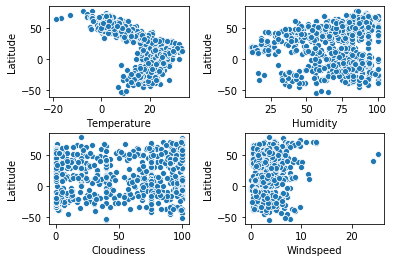

In [6]:
weather_data = pd.DataFrame({'Names': names, 'City Number': city_numbers, 'Temperature': temperature, 'Hemisphere': hemispheres, 'Latitude': latitudes, 'Longitudes': longitudes, 'Cloudiness': clouds, 'Humidity': humidity, 'Windspeed': windspeed})
data_number = len(weather_data)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x='Temperature', y='Latitude', data=weather_data, ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x='Humidity', y='Latitude', data=weather_data, ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x='Cloudiness', y='Latitude', data=weather_data, ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x='Windspeed', y='Latitude', data=weather_data, ax=ax)
plt.savefig('scatterplots')

print(f"These plots show the relationship between city latitude and its average temperature, humidity, cloudiness, and windspeed. The data includes {data_number} randomly selected cities across the world.")

# Regression Plots

In [7]:
north_data = weather_data[weather_data.Hemisphere == "Northern"]
south_data = weather_data[weather_data.Hemisphere == "Southern"]

The regression plots below demonstrate that temperatures tend to become more extreme the further one moves away from the equator.


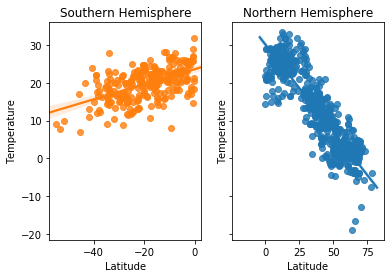

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x='Latitude', y='Temperature', data=north_data, ax=ax2).set_title('Northern Hemisphere')
sns.regplot(x='Latitude', y='Temperature', data=south_data, ax=ax1).set_title('Southern Hemisphere')
print(f"The regression plots below demonstrate that temperatures tend to become more extreme the further one moves away from the equator.")
plt.savefig('temperature_regplot')

The relationship with humidity is less clear. This is likely due to the random distribution of water. Two places with equal latitude could differ greatly in proximity to water.


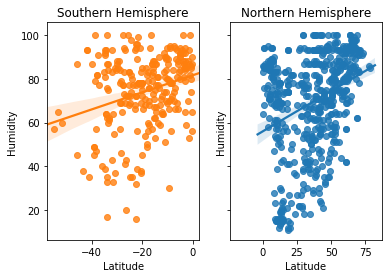

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x='Latitude', y='Humidity', data=north_data, ax=ax2).set_title('Northern Hemisphere')
sns.regplot(x='Latitude', y='Humidity', data=south_data, ax=ax1).set_title('Southern Hemisphere')
print(f"The relationship with humidity is less clear. This is likely due to the random distribution of water. Two places with equal latitude could differ greatly in proximity to water.")
plt.savefig('humidity_regplot')

Like humidity, cloudiness seems uncorrelated with latitude. Proximity to water might influence cloudiness as well.


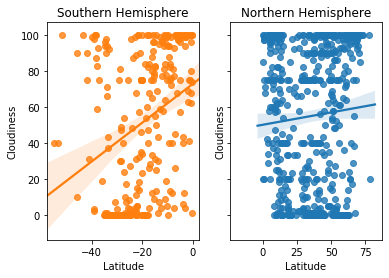

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x='Latitude', y='Cloudiness', data=north_data, ax=ax2).set_title('Northern Hemisphere')
sns.regplot(x='Latitude', y='Cloudiness', data=south_data, ax=ax1).set_title('Southern Hemisphere')
print(f"Like humidity, cloudiness seems uncorrelated with latitude. Proximity to water might influence cloudiness as well.")
plt.savefig('cloudiness_regplot')

Windspeed appears uncorrelated with latitude, suggesting that wind is influenced by other factors.


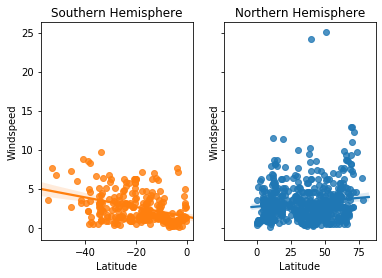

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x='Latitude', y='Windspeed', data=north_data, ax=ax2).set_title('Northern Hemisphere')
sns.regplot(x='Latitude', y='Windspeed', data=south_data, ax=ax1).set_title('Southern Hemisphere')
print(f"Windspeed appears uncorrelated with latitude, suggesting that wind is influenced by other factors.")
plt.savefig('windspeed_regplot')

In [12]:
weather_data.to_csv('weather_data')